In [8]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END


class State(TypedDict):
  topic: str
  joke: str


def refine_topic(state: State):
    return {"topic": state["topic"] + " and cats"}


def generate_joke(state: State):
    # return {"joke": f"This is a joke about {state['topic']}     "}
      return {"topic": f"This is a joke about {state['topic']}     "}

graph = (
  StateGraph(State)
  .add_node(refine_topic)
  .add_node(generate_joke)
  .add_edge(START, "refine_topic")
  .add_edge("refine_topic", "generate_joke")
  .add_edge("generate_joke", END)
  .compile()
)

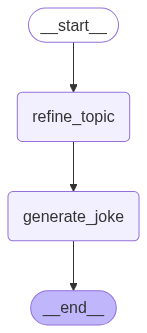

In [2]:
graph

### to stream only the state updates returned by the nodes after each step

In [6]:
for chunk in graph.stream(
    {"topic": "ice cream"},
    stream_mode="updates",
):
    print(chunk)

{'refine_topic': {'topic': 'ice cream and cats'}}
{'generate_joke': {'joke': 'This is a joke about ice cream and cats'}}


to stream the full state of the g

In [9]:
for chunk in graph.stream(
    {"topic": "ice cream"},
    stream_mode="values",
):
    print(chunk)

{'topic': 'ice cream'}
{'topic': 'ice cream and cats'}
{'topic': 'This is a joke about ice cream and cats     '}


In [11]:
for chunk in graph.stream(
    {"topic": "ice cream"},
    stream_mode="debug",
):
    print(chunk)

{'step': 1, 'timestamp': '2025-07-08T08:28:30.377545+00:00', 'type': 'task', 'payload': {'id': 'd460f39a-e27f-6f51-e734-4ce9f1619f3d', 'name': 'refine_topic', 'input': {'topic': 'ice cream'}, 'triggers': ('branch:to:refine_topic',)}}
{'step': 1, 'timestamp': '2025-07-08T08:28:30.377545+00:00', 'type': 'task_result', 'payload': {'id': 'd460f39a-e27f-6f51-e734-4ce9f1619f3d', 'name': 'refine_topic', 'error': None, 'result': [('topic', 'ice cream and cats')], 'interrupts': []}}
{'step': 2, 'timestamp': '2025-07-08T08:28:30.378541+00:00', 'type': 'task', 'payload': {'id': '365ece35-2d96-8a7c-f192-bd485f624d73', 'name': 'generate_joke', 'input': {'topic': 'ice cream and cats'}, 'triggers': ('branch:to:generate_joke',)}}
{'step': 2, 'timestamp': '2025-07-08T08:28:30.378541+00:00', 'type': 'task_result', 'payload': {'id': '365ece35-2d96-8a7c-f192-bd485f624d73', 'name': 'generate_joke', 'error': None, 'result': [('topic', 'This is a joke about ice cream and cats     ')], 'interrupts': []}}
